** Import Libraries **

In [1]:
## Import libraries
from ast import literal_eval
import os, glob, pandas as pd
import string, re
import numpy as np
from tqdm import tqdm
from collections import Counter
import numbers
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from string import ascii_lowercase
import os 
import glob
import re
import requests
import shutil
import pandas as pd
import time
from nltk import ngrams
from operator import itemgetter
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import pickle
from flashtext import KeywordProcessor
keyword_processor = KeywordProcessor()
from gensim.models import Word2Vec

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
os.chdir("C://Users//Ruben//Documents//GitHub//dhl-ads//resources")
df = pd.read_csv('total_results.csv')
occ_results = pd.read_csv('occupation_results.csv')

In [3]:
hisco_df = pd.read_csv('Release_HSN_HISCO_2013_01a.csv',sep=";",encoding = "ISO-8859-1")

In [4]:
hisco_dict = dict(zip(hisco_df.Standard, hisco_df.HISCO))

In [5]:
occ_results['hisco'] = ""

In [6]:
for i in [o for o in set(occ_results['occupation']) if o not in set(hisco_dict.keys())]:
    hisco_dict.update({i:"na"})

In [7]:
occ_results['hisco'] = [hisco_dict[o] for o in occ_results['occupation']]

In [8]:
res = []

for hiscode in sorted(list(set(occ_results['hisco'].astype(str).str[0:1])))[2:68]:
    
    ss = occ_results[occ_results['hisco'].astype(str).str[0:1] == hiscode]
    
    for y in list(set(ss['year'])):
        ss2 = ss[ss['year'] == y]
        sum_his_year = ss2['num_observations'].sum()
        res.append([hiscode,y,sum_his_year])
            

In [9]:
t = pd.DataFrame(res,columns = ['hisco','year','value'])

In [10]:
t

,hisco,year,value
0,2,1850,134
1,2,1851,188
2,2,1852,230
3,2,1853,188
4,2,1854,230
5,2,1855,124
6,2,1856,248
7,2,1857,250
8,2,1858,326
9,2,1859,398


In [99]:
t = t[t['value'] > 75]

In [100]:
t2 = pd.DataFrame()

for i in list(set(t['hisco'])):
    ss = t[t['hisco'] == i] 
    if len(ss) == 35:
        t2 =t2.append(ss)

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
t2['year'] = t2['year'].astype(int)

In [13]:
t = t[t['hisco'] != "n"]

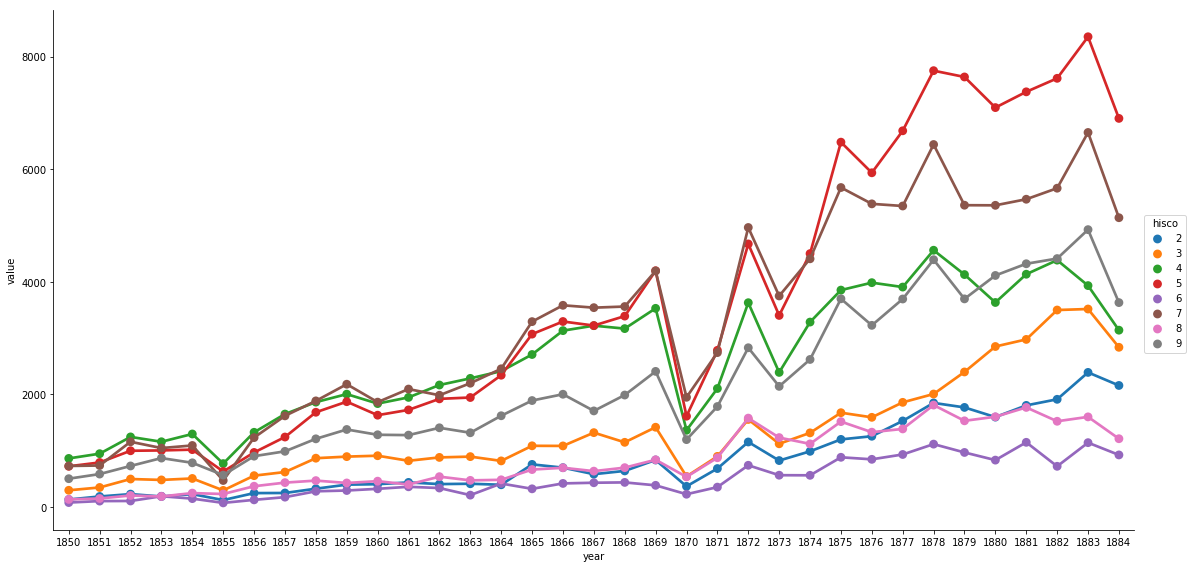

In [14]:
g = sns.factorplot(x="year", y="value", hue='hisco', data=t, size=8, aspect=2)